In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# original 11n model trained on coco 80 classes
model1 = YOLO('yolo11n.pt')

# new lvis trained 100 epochs on top of 11n model
model2 = YOLO('best-11n-100.pt')

# new lvis trained 100 epochs on top of 11m model
model3 = YOLO('best-11m-100.pt')

def show_side_by_side(filename):
    # results1 = model1(filename, classes=[16])
    # results2 = model2(filename, classes=[377])
    # results3 = model3(filename, classes=[377])

    results1 = model1(filename)
    results2 = model2(filename)
    results3 = model3(filename)
    
    img1 = results1[0].plot()
    img2 = results2[0].plot()
    img3 = results3[0].plot()
    
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img1)
    plt.title('Model 1: yolo11n.pt')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(img2)
    plt.title('Model 2: best-11n-100.pt')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(img3)
    plt.title('Model 3: best-11m-100.pt')
    plt.axis('off')
    
    plt.show()
# ...existing code...


image 1/1 /Users/Gerry.Wagner/develop/psueng/sweng-894-capstone/python/bailey.jpeg: 640x480 1 dog, 1 couch, 1 remote, 38.2ms
Speed: 3.0ms preprocess, 38.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /Users/Gerry.Wagner/develop/psueng/sweng-894-capstone/python/bailey.jpeg: 640x480 4 cushions, 1 dog, 1 drawer, 1 pillow, 1 sofa/couch/lounge, 40.8ms
Speed: 1.2ms preprocess, 40.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /Users/Gerry.Wagner/develop/psueng/sweng-894-capstone/python/bailey.jpeg: 640x480 5 cushions, 1 dog, 1 lamp, 1 lampshade, 1 remote control, 1 sofa/couch/lounge, 1 wall socket/wall plug/electric outlet/electrical outlet/outlet/electric receptacle, 84.2ms
Speed: 1.2ms preprocess, 84.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


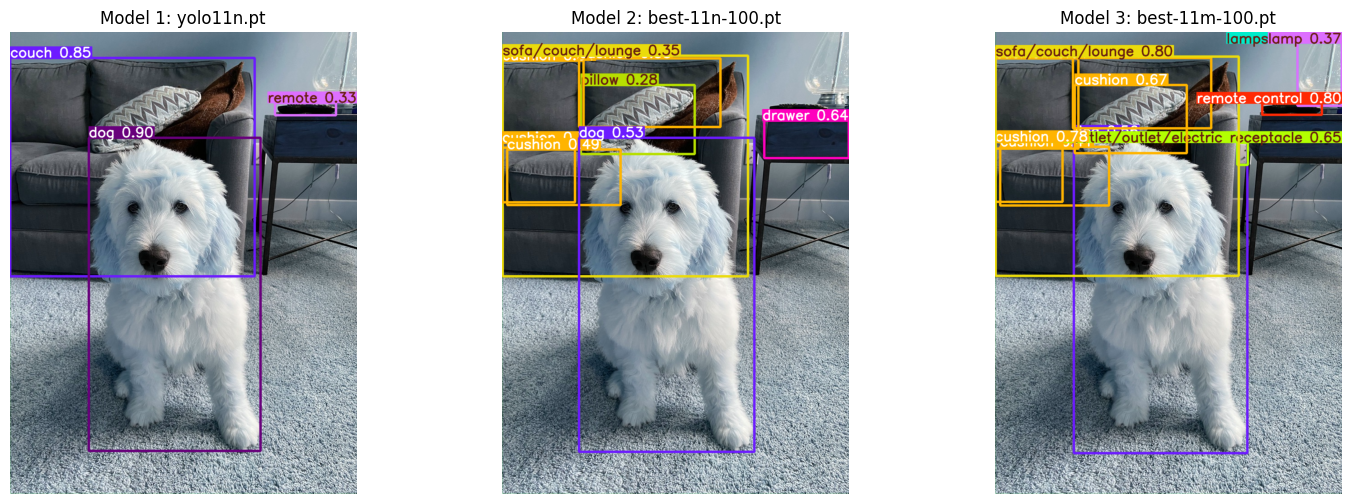

In [2]:
show_side_by_side("bailey.jpeg")


image 1/1 /Users/Gerry.Wagner/develop/psueng/sweng-894-capstone/python/bus.jpg: 640x480 4 persons, 1 bus, 43.4ms
Speed: 4.7ms preprocess, 43.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /Users/Gerry.Wagner/develop/psueng/sweng-894-capstone/python/bus.jpg: 640x480 1 bus/bus vehicle/autobus/charabanc/double-decker/motorbus/motorcoach, 32.0ms
Speed: 0.9ms preprocess, 32.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /Users/Gerry.Wagner/develop/psueng/sweng-894-capstone/python/bus.jpg: 640x480 1 bus/bus vehicle/autobus/charabanc/double-decker/motorbus/motorcoach, 1 coat, 84.7ms
Speed: 0.9ms preprocess, 84.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


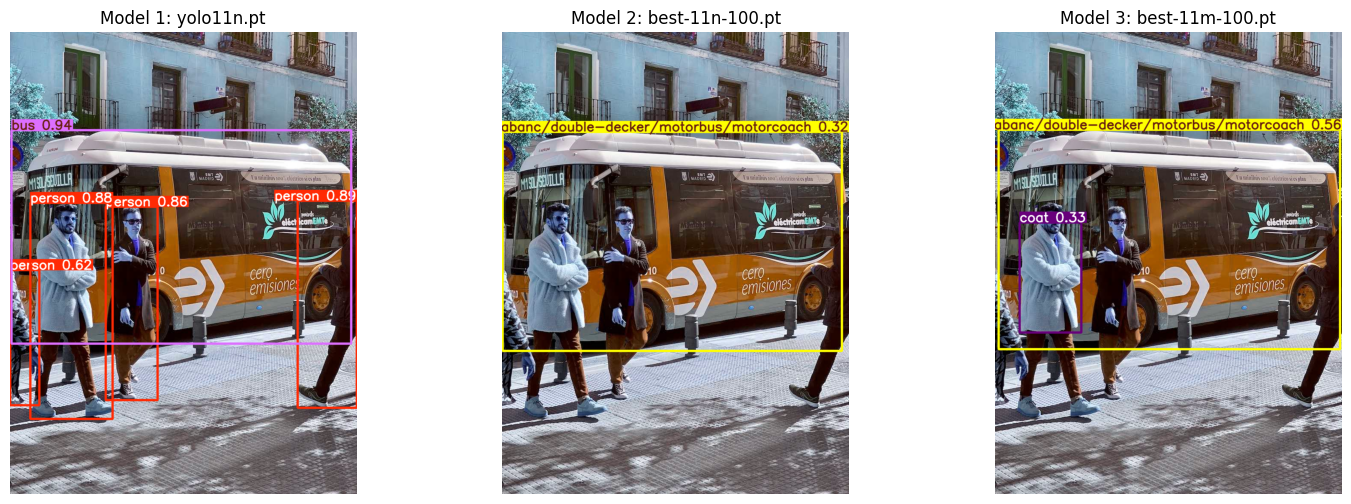

In [3]:
show_side_by_side("bus.jpg")

In [4]:
import torch

if torch.backends.mps.is_available():
    device = "mps"  # metal on macOS
elif torch.cuda.is_available():
    device = "cuda" # nvida GPU
else:
    device = "cpu"
    
print("Using device:", device)

Using device: mps


In [5]:
# Simple tensor operation on the selected device
x = torch.ones(1000, 1000, device=device)
y = torch.randn(1000, 1000, device=device)
z = x + y

print(f"Tensor z is on device: {z.device}")
print(f"z mean: {z.mean().item():.4f}")

Tensor z is on device: mps:0
z mean: 1.0010


In [10]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")
results = model.train(data="coco8.yaml", epochs=3, device=device)

# results = model("bus.jpg")

# # Export the model to ONNX format
# success = model.export(format="onnx")

New https://pypi.org/project/ultralytics/8.3.146 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.7.0 MPS (Apple M4 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train7, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=Tr

train: Scanning /Users/Gerry.Wagner/develop/psueng/datasets/coco8/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2247.6±1252.0 MB/s, size: 54.0 KB)



val: Scanning /Users/Gerry.Wagner/develop/psueng/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

Plotting labels to /Users/Gerry.Wagner/develop/psueng/sweng-894-capstone/runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /Users/Gerry.Wagner/develop/psueng/sweng-894-capstone/runs/detect/train7
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



        1/3      2.31G      1.063      3.436      1.224         24        640: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]

                   all          4         17      0.575       0.85      0.877      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      2.27G      1.523      2.506      1.728         28        640: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                   all          4         17      0.582       0.85      0.847      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.27G      1.309      2.251      1.852         19        640: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.93it/s]

                   all          4         17      0.576       0.85      0.849      0.652



3 epochs completed in 0.001 hours.
Optimizer stripped from /Users/Gerry.Wagner/develop/psueng/sweng-894-capstone/runs/detect/train7/weights/last.pt, 5.5MB
Optimizer stripped from /Users/Gerry.Wagner/develop/psueng/sweng-894-capstone/runs/detect/train7/weights/best.pt, 5.5MB

Validating /Users/Gerry.Wagner/develop/psueng/sweng-894-capstone/runs/detect/train7/weights/best.pt...
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.7.0 MPS (Apple M4 Pro)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]


                   all          4         17      0.574       0.85      0.849      0.652
                person          3         10      0.589        0.6      0.588      0.293
                   dog          1          1       0.55          1      0.995      0.796
                 horse          1          2      0.523          1      0.995      0.674
              elephant          1          2      0.364        0.5      0.524      0.259
              umbrella          1          1       0.57          1      0.995      0.995
          potted plant          1          1      0.851          1      0.995      0.895
Speed: 0.5ms preprocess, 10.6ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to /Users/Gerry.Wagner/develop/psueng/sweng-894-capstone/runs/detect/train7


## LVIS

- LVIS data set will take long time to train.  
- Below is on macbook pro m4 with 16 CPU / 20 GPU cores / 48GB shared memory ... each epoch is ~ 4 hrs.

```bash
      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      1/100      25.3G      1.343      6.553      1.289        343        640:   5%|▍         | 308/6212 [12:30<3:59:54,  2.44s/it]
```

- use `tmux` to run detatched on workstation

- default batch=16 which causes crash on RTX 4070 Super so set batch=10
- Below results show ~ 18 min to complete 1 epoch on the workstation (~30 hrs for 100 epochs)

```bash
      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      4/100       5.9G      1.568      3.702      1.425        159        640: 100%|__________| 9939/9939 [16:05<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|__________| 982/982 [01:41<00:00,  9.63it/s]
                   all      19626     244707      0.279     0.0493     0.0374      0.025
```



In [ ]:
# model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)
# results = model.train(data="lvis.yaml", epochs=100, imgsz=640, device=device)